In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [177]:
df = pd.read_csv("Housing.csv")
display(df) 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Problme 1a

In [178]:
#accessing columns that were asked
#loc = index by name and name is string
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "parking"]]
price = df.iloc[:,0] #iloc = index by number

maxes = []
# for i in range(5):
#   maxes.append(max(reduced_df.iloc[:,i]))
#   reduced_df.iloc[:,i] = reduced_df.iloc[:,i]/maxes[-1]

# maxes.append(max(price))
# price = price/maxes[-1]
# reduced_df.iloc[:,0] = reduced_df.iloc[:,0]/max(reduced_df.iloc[:,0])
print(price)
print(reduced_df.iloc[:,:])
print(maxes)


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
     area  bedrooms  bathrooms  stories  parking
0    7420         4          2        3        2
1    8960         4          4        4        3
2    9960         3          2        2        2
3    7500         4          2        2        3
4    7420         4          1        2        2
..    ...       ...        ...      ...      ...
540  3000         2          1        1        2
541  2400         3          1        1        0
542  3620         2          1        1        0
543  2910         3          1        1        0
544  3850         3          1        2        0

[545 rows x 5 columns]
[]


In [179]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [180]:
print('features:\n', X_train[0]) #shows all 5 X values 
print('example price:', y_train[0]) 

features:
 [6000    3    2    4    1]
example price: 7525000


In [181]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,5)
print('Xvals: \n', X_train[:5,:])
m

Xvals: 
 [[6000    3    2    4    1]
 [7200    3    2    1    3]
 [3816    2    1    1    2]
 [2610    3    1    2    0]
 [3750    3    1    2    0]]


436

In [182]:
m = len(X_train)
n = len(X_test)
X_train_1 = np.ones((m,1)) #1 column
X_test_1 = np.ones((n,1)) #1 column
X_train_1[:1], len(X_train_1) #1 row

(array([[1.]]), 436)

In [183]:
X_train = np.hstack((X_train_1, X_train))
X_test = np.hstack((X_test_1, X_test))
X_train[:5]

array([[1.000e+00, 6.000e+03, 3.000e+00, 2.000e+00, 4.000e+00, 1.000e+00],
       [1.000e+00, 7.200e+03, 3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00],
       [1.000e+00, 3.816e+03, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00],
       [1.000e+00, 2.610e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 3.750e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00]])

In [184]:
theta = np.zeros(6)
iterations = 1500
alpha = .0000000001
theta.shape

(6,)

In [185]:
def compute_loss(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [186]:
cost = compute_loss(X_train,y_train, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  12617396203243.809


In [187]:
def gradient_descent(X, Y, theta, alpha, iterations, train=True):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    if train:
      sum_delta = (alpha/m)*X.transpose().dot(errors)
      theta = theta - sum_delta
    cost_history[i] = compute_loss(X, Y, theta)
    
  return theta, cost_history

In [188]:
theta, cost_history = gradient_descent(X_train, y_train,theta, alpha, iterations)
theta, test_history = gradient_descent(X_test, y_test,theta, alpha, iterations, train = False)

print('Final value of theta =', theta)
print('cost_history = ', cost_history[2:])
len(cost_history)

Final value of theta = [1.94414246e-01 8.30456226e+02 6.23040970e-01 2.92262578e-01
 4.24703458e-01 1.55536615e-01]
cost_history =  [1.24111673e+13 1.23432850e+13 1.22758284e+13 ... 1.59026477e+12
 1.59025920e+12 1.59025365e+12]


1500

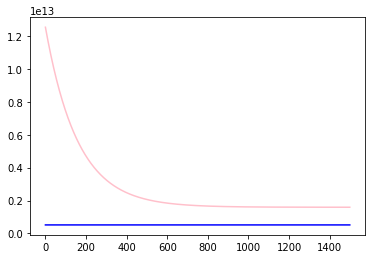

In [189]:
plt.plot(cost_history, color = 'pink', label = 'training data')
plt.plot(test_history, color = 'blue', label = 'testing data')

Problem 1b

In [190]:
#accessing columns that were asked
#loc = index by name and name is string
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea"]]
price = df.iloc[:,0] #iloc = index by number

# arr = [1, 2, 3]
# print([i for i in arr])
# print([i**2 for i in arr])
# print([i for i in arr if i%2 == 1])

for column_index in [4, 5, 6, 7, 8, 10]:
    reduced_df.iloc[:,column_index] = reduced_df.iloc[:,column_index].map({"yes": 1, "no": 0})
display(reduced_df.head())

maxes = []

# for i in range(11):
#   maxes.append(max(reduced_df.iloc[:,i]))
#   reduced_df.iloc[:,i] = reduced_df.iloc[:,i]/maxes[-1]

# maxes.append(max(price))
# price = price/maxes[-1]
# reduced_df.iloc[:,0] = reduced_df.iloc[:,0]/max(reduced_df.iloc[:,0])
print(price)
print(reduced_df.iloc[:,:])
print(maxes)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1      

In [191]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [192]:
print('features:\n', X_train[0]) #shows all 5 X values 
print('example price:', y_train[0]) 

features:
 [6000    3    2    4    1    0    0    0    1    1    0]
example price: 7525000


In [193]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,11)
print('Xvals: \n', X_train[:11,:])
m

Xvals: 
 [[6000    3    2    4    1    0    0    0    1    1    0]
 [7200    3    2    1    1    0    1    0    1    3    0]
 [3816    2    1    1    1    0    1    0    1    2    0]
 [2610    3    1    2    1    0    1    0    0    0    1]
 [3750    3    1    2    1    0    0    0    0    0    0]
 [5010    3    1    2    1    0    1    0    0    0    0]
 [3850    3    1    2    1    0    0    0    0    0    0]
 [5076    3    1    1    0    0    0    0    0    0    0]
 [3180    3    1    1    0    0    0    0    0    0    0]
 [6020    3    1    1    1    0    0    0    0    0    0]
 [3120    3    1    2    0    0    1    1    0    0    0]]


436

In [194]:
m = len(X_train)
n = len(X_test)
X_train_1 = np.ones((m,1)) #1 column
X_test_1 = np.ones((n,1)) #1 column
X_train_1[:1], len(X_train_1) #1 row

(array([[1.]]), 436)

In [195]:
X_train = np.hstack((X_train_1, X_train))
X_test = np.hstack((X_test_1, X_test))
X_train[:5]

array([[1.000e+00, 6.000e+03, 3.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 7.200e+03, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00],
       [1.000e+00, 3.816e+03, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 2.610e+03, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 3.750e+03, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [196]:
theta = np.zeros(12)
iterations = 1500
alpha = .0000000001
theta.shape

(12,)

In [197]:
def compute_loss(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [198]:
cost = compute_loss(X_train,y_train, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  12617396203243.809


In [199]:
def gradient_descent(X, Y, theta, alpha, iterations, train = True):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha/m)*X.transpose().dot(errors)
    theta = theta - sum_delta
    cost_history[i] = compute_loss(X, Y, theta)
    
  return theta, cost_history

In [200]:
theta, cost_history = gradient_descent(X_train, y_train,theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history = ', cost_history[2:])
len(cost_history)

Final value of theta = [1.94414238e-01 8.30456190e+02 6.23040945e-01 2.92262567e-01
 4.24703443e-01 1.72499519e-01 4.67442179e-02 9.14051009e-02
 1.43612303e-02 9.52339961e-02 1.55536609e-01 5.97006390e-02]
cost_history =  [1.24111673e+13 1.23432850e+13 1.22758284e+13 ... 1.59026464e+12
 1.59025907e+12 1.59025353e+12]


1500

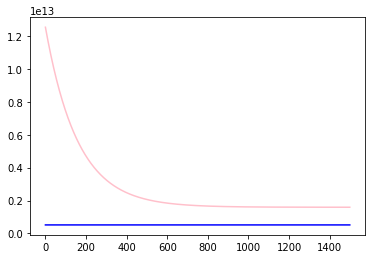

In [201]:
plt.plot(cost_history, color = 'pink', label = 'training data')
plt.plot(test_history, color = 'blue', label = 'testing data')

Problem 2a

In [202]:
def normalize_dataframe(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df_normalized = df.copy()
    for col in numerical_cols:
        col_mean = df[col].mean()
        col_std = df[col].std()
        df_normalized[col] = (df[col] - col_mean) / col_std
    return df_normalized

In [203]:
#accessing columns that were asked
#loc = index by name and name is string
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "parking"]]
price = df.iloc[:,0] #iloc = index by number

maxes = []
reduced_df = normalize_dataframe(reduced_df)
for i in range(5):
  maxes.append(max(reduced_df.iloc[:,i]))
  reduced_df.iloc[:,i] = reduced_df.iloc[:,i]/maxes[-1]

maxes.append(max(price))
price = price/maxes[-1]
reduced_df.iloc[:,0] = reduced_df.iloc[:,0]/max(reduced_df.iloc[:,0])
print(price)
print(reduced_df.iloc[:,:])
print(maxes)


0      1.000000
1      0.921053
2      0.921053
3      0.918421
4      0.857895
         ...   
540    0.136842
541    0.132868
542    0.131579
543    0.131579
544    0.131579
Name: price, Length: 545, dtype: float64
         area  bedrooms  bathrooms   stories   parking
0    0.205391  0.340992   0.263016  0.544314  0.566428
1    0.344764  0.340992   1.000000  1.000000  1.000000
2    0.435266  0.011487   0.263016  0.088629  0.566428
3    0.212631  0.340992   0.263016  0.088629  1.000000
4    0.205391  0.340992  -0.105477  0.088629  0.566428
..        ...       ...        ...       ...       ...
540 -0.194629 -0.318017  -0.105477 -0.367057  0.566428
541 -0.248930  0.011487  -0.105477 -0.367057 -0.300716
542 -0.138517 -0.318017  -0.105477 -0.367057 -0.300716
543 -0.202774  0.011487  -0.105477 -0.367057 -0.300716
544 -0.117702  0.011487  -0.105477  0.088629 -0.300716

[545 rows x 5 columns]
[5.091585570242134, 4.111923842176972, 5.400846899372526, 2.529699688044935, 2.6769500506662025, 13

In [204]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [205]:
print('features:\n', X_train[0]) #shows all 5 X values 
print('example price:', y_train[0]) 

features:
 [0.07687786 0.0114873  0.26301555 1.         0.13285601]
example price: 0.5657894736842105


In [206]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,5)
print('Xvals: \n', X_train[:5,:])
m

Xvals: 
 [[ 0.07687786  0.0114873   0.26301555  1.          0.13285601]
 [ 0.18548046  0.0114873   0.26301555 -0.36705686  1.        ]
 [-0.12077888 -0.31801693 -0.10547667 -0.36705686  0.566428  ]
 [-0.2299245   0.0114873  -0.10547667  0.08862876 -0.30071599]
 [-0.12675203  0.0114873  -0.10547667  0.08862876 -0.30071599]]


436

In [207]:
m = len(X_train)
n = len(X_test)
X_train_1 = np.ones((m,1)) #1 column
X_test_1 = np.ones((n,1)) #1 column
X_train_1[:1], len(X_train_1) #1 row

(array([[1.]]), 436)

In [208]:
X_train = np.hstack((X_train_1, X_train))
X_test = np.hstack((X_test_1, X_test))
X_train[:5]

array([[ 1.        ,  0.07687786,  0.0114873 ,  0.26301555,  1.        ,
         0.13285601],
       [ 1.        ,  0.18548046,  0.0114873 ,  0.26301555, -0.36705686,
         1.        ],
       [ 1.        , -0.12077888, -0.31801693, -0.10547667, -0.36705686,
         0.566428  ],
       [ 1.        , -0.2299245 ,  0.0114873 , -0.10547667,  0.08862876,
        -0.30071599],
       [ 1.        , -0.12675203,  0.0114873 , -0.10547667,  0.08862876,
        -0.30071599]])

In [209]:
theta = np.zeros(6)
iterations = 1500
alpha = .01
theta.shape

(6,)

In [210]:
def compute_loss(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [211]:
cost = compute_loss(X_train,y_train, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  0.07132905310217541


In [212]:
def gradient_descent(X, Y, theta, alpha, iterations, train=True):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    if train:
      sum_delta = (alpha/m)*X.transpose().dot(errors)
      theta = theta - sum_delta
    cost_history[i] = compute_loss(X, Y, theta)
    
  return theta, cost_history

In [213]:
theta, cost_history = gradient_descent(X_train, y_train,theta, alpha, iterations)
theta, test_history = gradient_descent(X_test, y_test,theta, alpha, iterations, train = False)

print('Final value of theta =', theta)
print('cost_history = ', cost_history[2:])
len(cost_history)

Final value of theta = [0.35598472 0.12594212 0.06378406 0.10164363 0.09412014 0.08882613]
cost_history =  [0.06763439 0.0664511  0.06529114 ... 0.00441907 0.00441863 0.00441819]


1500

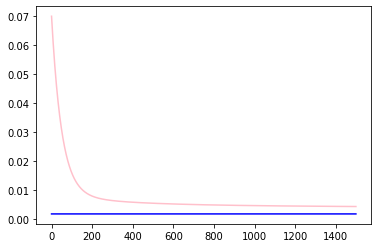

In [214]:
plt.plot(cost_history, color = 'pink', label = 'training data')
plt.plot(test_history, color = 'blue', label = 'testing data')

Poblem 2b

In [215]:
#accessing columns that were asked
#loc = index by name and name is string
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea"]]
price = df.iloc[:,0] #iloc = index by number

# arr = [1, 2, 3]
# print([i for i in arr])
# print([i**2 for i in arr])
# print([i for i in arr if i%2 == 1])

for column_index in [4, 5, 6, 7, 8, 10]:
    reduced_df.iloc[:,column_index] = reduced_df.iloc[:,column_index].map({"yes": 1, "no": 0})
display(reduced_df.head())

maxes = []

reduced_df = normalize_dataframe(reduced_df)

for i in range(11):
  maxes.append(max(reduced_df.iloc[:,i]))
  reduced_df.iloc[:,i] = reduced_df.iloc[:,i]/maxes[-1]

maxes.append(max(price))
price = price/maxes[-1]
reduced_df.iloc[:,0] = reduced_df.iloc[:,0]/max(reduced_df.iloc[:,0])
print(price)
print(reduced_df.iloc[:,:])
print(maxes)



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


0      1.000000
1      0.921053
2      0.921053
3      0.918421
4      0.857895
         ...   
540    0.136842
541    0.132868
542    0.131579
543    0.131579
544    0.131579
Name: price, Length: 545, dtype: float64
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0    0.205391  0.340992   0.263016  0.544314  1.000000  -0.216518 -0.539548   
1    0.344764  0.340992   1.000000  1.000000  1.000000  -0.216518 -0.539548   
2    0.435266  0.011487   0.263016  0.088629  1.000000  -0.216518  1.000000   
3    0.212631  0.340992   0.263016  0.088629  1.000000  -0.216518  1.000000   
4    0.205391  0.340992  -0.105477  0.088629  1.000000   1.000000  1.000000   
..        ...       ...        ...       ...       ...        ...       ...   
540 -0.194629 -0.318017  -0.105477 -0.367057  1.000000  -0.216518  1.000000   
541 -0.248930  0.011487  -0.105477 -0.367057 -6.077922  -0.216518 -0.539548   
542 -0.138517 -0.318017  -0.105477 -0.367057  1.000000  -0.216518 -0.539

In [216]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [217]:
print('features:\n', X_train[0]) #shows all 5 X values 
print('example price:', y_train[0]) 

features:
 [ 0.07687786  0.0114873   0.26301555  1.          1.         -0.21651786
 -0.53954802 -0.04807692  1.          0.13285601 -0.30695444]
example price: 0.5657894736842105


In [218]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,11)
print('Xvals: \n', X_train[:11,:])
m

Xvals: 
 [[ 0.07687786  0.0114873   0.26301555  1.          1.         -0.21651786
  -0.53954802 -0.04807692  1.          0.13285601 -0.30695444]
 [ 0.18548046  0.0114873   0.26301555 -0.36705686  1.         -0.21651786
   1.         -0.04807692  1.          1.         -0.30695444]
 [-0.12077888 -0.31801693 -0.10547667 -0.36705686  1.         -0.21651786
   1.         -0.04807692  1.          0.566428   -0.30695444]
 [-0.2299245   0.0114873  -0.10547667  0.08862876  1.         -0.21651786
   1.         -0.04807692 -0.46112601 -0.30071599  1.        ]
 [-0.12675203  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
  -0.53954802 -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.01271929  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
   1.         -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.11770181  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
  -0.53954802 -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.00674615  0.0114873  -0.105

436

In [219]:
m = len(X_train)
n = len(X_test)
X_train_1 = np.ones((m,1)) #1 column
X_test_1 = np.ones((n,1)) #1 column
X_train_1[:5], len(X_train_1) #1 row

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 436)

In [220]:
X_train = np.hstack((X_train_1, X_train))
X_test = np.hstack((X_test_1, X_test))
X_train[:5]

array([[ 1.        ,  0.07687786,  0.0114873 ,  0.26301555,  1.        ,
         1.        , -0.21651786, -0.53954802, -0.04807692,  1.        ,
         0.13285601, -0.30695444],
       [ 1.        ,  0.18548046,  0.0114873 ,  0.26301555, -0.36705686,
         1.        , -0.21651786,  1.        , -0.04807692,  1.        ,
         1.        , -0.30695444],
       [ 1.        , -0.12077888, -0.31801693, -0.10547667, -0.36705686,
         1.        , -0.21651786,  1.        , -0.04807692,  1.        ,
         0.566428  , -0.30695444],
       [ 1.        , -0.2299245 ,  0.0114873 , -0.10547667,  0.08862876,
         1.        , -0.21651786,  1.        , -0.04807692, -0.46112601,
        -0.30071599,  1.        ],
       [ 1.        , -0.12675203,  0.0114873 , -0.10547667,  0.08862876,
         1.        , -0.21651786, -0.53954802, -0.04807692, -0.46112601,
        -0.30071599, -0.30695444]])

In [221]:
theta = np.zeros(12)
iterations = 1500
alpha = .01
theta.shape

(12,)

In [222]:
def compute_loss(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [223]:
cost = compute_loss(X_train,y_train, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  0.07132905310217541


In [224]:
def gradient_descent(X, Y, theta, alpha, iterations,train = True):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    if train:
      sum_delta = (alpha/m)*X.transpose().dot(errors)
      theta = theta - sum_delta
    cost_history[i] = compute_loss(X, Y, theta)
    
  return theta, cost_history

In [225]:
theta, cost_history = gradient_descent(X_train, y_train,theta, alpha, iterations)
theta, test_history = gradient_descent(X_test, y_test,theta, alpha, iterations, train = False)
print('Final value of theta =', theta)
print('cost_history = ', cost_history[2:])
len(cost_history)

Final value of theta = [0.35585743 0.09012686 0.04931931 0.08952685 0.07344395 0.00611183
 0.02394733 0.02030264 0.03399489 0.04994878 0.06349352 0.03876027]
cost_history =  [0.06731463 0.06604516 0.0648073  ... 0.00327253 0.0032722  0.00327188]


1500

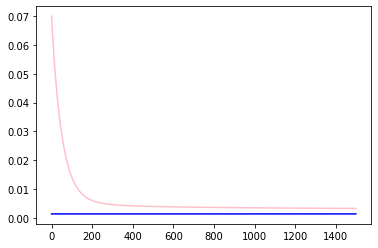

In [226]:
plt.plot(cost_history, color = 'pink', label = 'training data')
plt.plot(test_history, color = 'blue', label = 'testing data')

Problem 3a

In [227]:
#accessing columns that were asked
#loc = index by name and name is string
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "parking"]]
price = df.iloc[:,0] #iloc = index by number

maxes = []
reduced_df = normalize_dataframe(reduced_df)
for i in range(5):
  maxes.append(max(reduced_df.iloc[:,i]))
  reduced_df.iloc[:,i] = reduced_df.iloc[:,i]/maxes[-1]

maxes.append(max(price))
price = price/maxes[-1]
reduced_df.iloc[:,0] = reduced_df.iloc[:,0]/max(reduced_df.iloc[:,0])
print(price)
print(reduced_df.iloc[:,:])
print(maxes)


0      1.000000
1      0.921053
2      0.921053
3      0.918421
4      0.857895
         ...   
540    0.136842
541    0.132868
542    0.131579
543    0.131579
544    0.131579
Name: price, Length: 545, dtype: float64
         area  bedrooms  bathrooms   stories   parking
0    0.205391  0.340992   0.263016  0.544314  0.566428
1    0.344764  0.340992   1.000000  1.000000  1.000000
2    0.435266  0.011487   0.263016  0.088629  0.566428
3    0.212631  0.340992   0.263016  0.088629  1.000000
4    0.205391  0.340992  -0.105477  0.088629  0.566428
..        ...       ...        ...       ...       ...
540 -0.194629 -0.318017  -0.105477 -0.367057  0.566428
541 -0.248930  0.011487  -0.105477 -0.367057 -0.300716
542 -0.138517 -0.318017  -0.105477 -0.367057 -0.300716
543 -0.202774  0.011487  -0.105477 -0.367057 -0.300716
544 -0.117702  0.011487  -0.105477  0.088629 -0.300716

[545 rows x 5 columns]
[5.091585570242134, 4.111923842176972, 5.400846899372526, 2.529699688044935, 2.6769500506662025, 13

In [228]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [229]:
print('features:\n', X_train[0]) #shows all 5 X values 
print('example price:', y_train[0]) 

features:
 [0.07687786 0.0114873  0.26301555 1.         0.13285601]
example price: 0.5657894736842105


In [230]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,5)
print('Xvals: \n', X_train[:5,:])
m

Xvals: 
 [[ 0.07687786  0.0114873   0.26301555  1.          0.13285601]
 [ 0.18548046  0.0114873   0.26301555 -0.36705686  1.        ]
 [-0.12077888 -0.31801693 -0.10547667 -0.36705686  0.566428  ]
 [-0.2299245   0.0114873  -0.10547667  0.08862876 -0.30071599]
 [-0.12675203  0.0114873  -0.10547667  0.08862876 -0.30071599]]


436

In [231]:
m = len(X_train)
n = len(X_test)
X_train_1 = np.ones((m,1)) #1 column
X_test_1 = np.ones((n,1)) #1 column
X_train_1[:1], len(X_train_1) #1 row

(array([[1.]]), 436)

In [232]:
X_train = np.hstack((X_train_1, X_train))
X_test = np.hstack((X_test_1, X_test))
X_train[:5], 

(array([[ 1.        ,  0.07687786,  0.0114873 ,  0.26301555,  1.        ,
          0.13285601],
        [ 1.        ,  0.18548046,  0.0114873 ,  0.26301555, -0.36705686,
          1.        ],
        [ 1.        , -0.12077888, -0.31801693, -0.10547667, -0.36705686,
          0.566428  ],
        [ 1.        , -0.2299245 ,  0.0114873 , -0.10547667,  0.08862876,
         -0.30071599],
        [ 1.        , -0.12675203,  0.0114873 , -0.10547667,  0.08862876,
         -0.30071599]]),)

In [233]:
theta = np.zeros(6)
iterations = 1500
alpha = .01
theta.shape

(6,)

In [234]:
def compute_loss(X, Y, theta, lambda_reg=0.1):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    sqrErrors = np.square(errors)
    regularization = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
    J = 1/(2*m) * np.sum(sqrErrors) + regularization
    return J

In [235]:
cost = compute_loss(X_train,y_train, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  0.07132905310217541


In [236]:
def gradient_descent(X, Y, theta, alpha, iterations, lambda_reg=0.1, train=True):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        if train:
            regularization = (lambda_reg/(2*m)) * np.sum(theta[1:]**2)
            sum_delta = (alpha/m)*X.transpose().dot(errors) + regularization
            theta = theta - sum_delta
        cost_history[i] = compute_loss(X, Y, theta, lambda_reg)
        
    return theta, cost_history

In [237]:
X_train

array([[ 1.        ,  0.07687786,  0.0114873 ,  0.26301555,  1.        ,
         0.13285601],
       [ 1.        ,  0.18548046,  0.0114873 ,  0.26301555, -0.36705686,
         1.        ],
       [ 1.        , -0.12077888, -0.31801693, -0.10547667, -0.36705686,
         0.566428  ],
       ...,
       [ 1.        , -0.0588754 ,  0.0114873 ,  0.26301555,  0.54431438,
         0.13285601],
       [ 1.        , -0.1005064 , -0.31801693, -0.10547667, -0.36705686,
        -0.30071599],
       [ 1.        ,  0.03162677,  0.0114873 ,  0.26301555,  1.        ,
         0.13285601]])

In [238]:
X_train

array([[ 1.        ,  0.07687786,  0.0114873 ,  0.26301555,  1.        ,
         0.13285601],
       [ 1.        ,  0.18548046,  0.0114873 ,  0.26301555, -0.36705686,
         1.        ],
       [ 1.        , -0.12077888, -0.31801693, -0.10547667, -0.36705686,
         0.566428  ],
       ...,
       [ 1.        , -0.0588754 ,  0.0114873 ,  0.26301555,  0.54431438,
         0.13285601],
       [ 1.        , -0.1005064 , -0.31801693, -0.10547667, -0.36705686,
        -0.30071599],
       [ 1.        ,  0.03162677,  0.0114873 ,  0.26301555,  1.        ,
         0.13285601]])

In [239]:
theta, cost_history = gradient_descent(X=X_train, Y=y_train, theta=theta, alpha=alpha, iterations=iterations)
theta, test_history = gradient_descent(X_test, y_test,theta, alpha, iterations, train = False)

print('Final value of theta =', theta)
print('cost_history = ', cost_history[2:])
len(cost_history)

Final value of theta = [0.35545312 0.12310667 0.06147617 0.09879753 0.09257036 0.08708548]
cost_history =  [0.06763439 0.0664511  0.06529114 ... 0.00445522 0.00445479 0.00445437]


1500

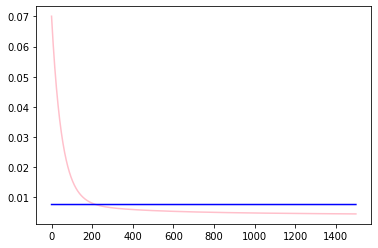

In [240]:
plt.plot(cost_history, color = 'pink', label = 'training data')
plt.plot(test_history, color = 'blue', label = 'testing data')

Problem 3b

In [241]:
#accessing columns that were asked
#loc = index by name and name is string
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea"]]
price = df.iloc[:,0] #iloc = index by number

# arr = [1, 2, 3]
# print([i for i in arr])
# print([i**2 for i in arr])
# print([i for i in arr if i%2 == 1])

for column_index in [4, 5, 6, 7, 8, 10]:
    reduced_df.iloc[:,column_index] = reduced_df.iloc[:,column_index].map({"yes": 1, "no": 0})
display(reduced_df.head())

maxes = []
reduced_df = normalize_dataframe(reduced_df)
for i in range(11):
  maxes.append(max(reduced_df.iloc[:,i]))
  reduced_df.iloc[:,i] = reduced_df.iloc[:,i]/maxes[-1]

maxes.append(max(price))
price = price/maxes[-1]
reduced_df.iloc[:,0] = reduced_df.iloc[:,0]/max(reduced_df.iloc[:,0])
print(price)
print(reduced_df.iloc[:,:])
print(maxes)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


0      1.000000
1      0.921053
2      0.921053
3      0.918421
4      0.857895
         ...   
540    0.136842
541    0.132868
542    0.131579
543    0.131579
544    0.131579
Name: price, Length: 545, dtype: float64
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0    0.205391  0.340992   0.263016  0.544314  1.000000  -0.216518 -0.539548   
1    0.344764  0.340992   1.000000  1.000000  1.000000  -0.216518 -0.539548   
2    0.435266  0.011487   0.263016  0.088629  1.000000  -0.216518  1.000000   
3    0.212631  0.340992   0.263016  0.088629  1.000000  -0.216518  1.000000   
4    0.205391  0.340992  -0.105477  0.088629  1.000000   1.000000  1.000000   
..        ...       ...        ...       ...       ...        ...       ...   
540 -0.194629 -0.318017  -0.105477 -0.367057  1.000000  -0.216518  1.000000   
541 -0.248930  0.011487  -0.105477 -0.367057 -6.077922  -0.216518 -0.539548   
542 -0.138517 -0.318017  -0.105477 -0.367057  1.000000  -0.216518 -0.539

In [242]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [243]:
print('features:\n', X_train[0]) #shows all 5 X values 
print('example price:', y_train[0]) 

features:
 [ 0.07687786  0.0114873   0.26301555  1.          1.         -0.21651786
 -0.53954802 -0.04807692  1.          0.13285601 -0.30695444]
example price: 0.5657894736842105


In [244]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,11)
print('Xvals: \n', X_train[:11,:])
m

Xvals: 
 [[ 0.07687786  0.0114873   0.26301555  1.          1.         -0.21651786
  -0.53954802 -0.04807692  1.          0.13285601 -0.30695444]
 [ 0.18548046  0.0114873   0.26301555 -0.36705686  1.         -0.21651786
   1.         -0.04807692  1.          1.         -0.30695444]
 [-0.12077888 -0.31801693 -0.10547667 -0.36705686  1.         -0.21651786
   1.         -0.04807692  1.          0.566428   -0.30695444]
 [-0.2299245   0.0114873  -0.10547667  0.08862876  1.         -0.21651786
   1.         -0.04807692 -0.46112601 -0.30071599  1.        ]
 [-0.12675203  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
  -0.53954802 -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.01271929  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
   1.         -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.11770181  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
  -0.53954802 -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.00674615  0.0114873  -0.105

436

In [245]:
# 5x5
# shows first 5 rows of area, bedrooms, bathrooms, stories, parking
m = len(X_train)
X_train = X_train.reshape(m,11)
print('Xvals: \n', X_train[:11,:])
m

Xvals: 
 [[ 0.07687786  0.0114873   0.26301555  1.          1.         -0.21651786
  -0.53954802 -0.04807692  1.          0.13285601 -0.30695444]
 [ 0.18548046  0.0114873   0.26301555 -0.36705686  1.         -0.21651786
   1.         -0.04807692  1.          1.         -0.30695444]
 [-0.12077888 -0.31801693 -0.10547667 -0.36705686  1.         -0.21651786
   1.         -0.04807692  1.          0.566428   -0.30695444]
 [-0.2299245   0.0114873  -0.10547667  0.08862876  1.         -0.21651786
   1.         -0.04807692 -0.46112601 -0.30071599  1.        ]
 [-0.12675203  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
  -0.53954802 -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.01271929  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
   1.         -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.11770181  0.0114873  -0.10547667  0.08862876  1.         -0.21651786
  -0.53954802 -0.04807692 -0.46112601 -0.30071599 -0.30695444]
 [-0.00674615  0.0114873  -0.105

436

In [246]:
m = len(X_train)
n = len(X_test)
X_train_1 = np.ones((m,1)) #1 column
X_test_1 = np.ones((n,1)) #1 column
X_train_1[:1], len(X_train_1) #1 row

(array([[1.]]), 436)

In [247]:
X_train = np.hstack((X_train_1, X_train))
X_test = np.hstack((X_test_1, X_test))
X_train[:5]

array([[ 1.        ,  0.07687786,  0.0114873 ,  0.26301555,  1.        ,
         1.        , -0.21651786, -0.53954802, -0.04807692,  1.        ,
         0.13285601, -0.30695444],
       [ 1.        ,  0.18548046,  0.0114873 ,  0.26301555, -0.36705686,
         1.        , -0.21651786,  1.        , -0.04807692,  1.        ,
         1.        , -0.30695444],
       [ 1.        , -0.12077888, -0.31801693, -0.10547667, -0.36705686,
         1.        , -0.21651786,  1.        , -0.04807692,  1.        ,
         0.566428  , -0.30695444],
       [ 1.        , -0.2299245 ,  0.0114873 , -0.10547667,  0.08862876,
         1.        , -0.21651786,  1.        , -0.04807692, -0.46112601,
        -0.30071599,  1.        ],
       [ 1.        , -0.12675203,  0.0114873 , -0.10547667,  0.08862876,
         1.        , -0.21651786, -0.53954802, -0.04807692, -0.46112601,
        -0.30071599, -0.30695444]])

In [248]:
theta = np.zeros(12)
iterations = 1500
alpha = .01
theta.shape

(12,)

In [249]:
def compute_loss(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1/(2*m) * np.sum(sqrErrors)
  return J

In [250]:
cost = compute_loss(X_train,y_train, theta)
print('The cost for given values of theta_0 and theta_1 = ', cost)

The cost for given values of theta_0 and theta_1 =  0.07132905310217541


In [251]:
def gradient_descent(X, Y, theta, alpha, iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha/m)*X.transpose().dot(errors)
    theta = theta - sum_delta
    cost_history[i] = compute_loss(X, Y, theta)
    
  return theta, cost_history

In [252]:
theta, cost_history = gradient_descent(X_train, y_train,theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history = ', cost_history[2:])
len(cost_history)

Final value of theta = [0.35585743 0.09012686 0.04931931 0.08952685 0.07344395 0.00611183
 0.02394733 0.02030264 0.03399489 0.04994878 0.06349352 0.03876027]
cost_history =  [0.06731463 0.06604516 0.0648073  ... 0.00327253 0.0032722  0.00327188]


1500

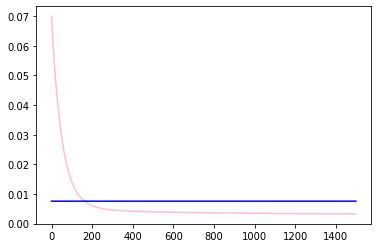

In [253]:
plt.plot(cost_history, color = 'pink', label = 'training data')
plt.plot(test_history, color = 'blue', label = 'testing data')